In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
from pandas import DataFrame, Series

In [20]:
titanic_df = pd.read_csv("train.csv")
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


All good data analysis projects begin with trying to answer questions.So here's a list of questions I'll try to answer using our new data analysis skills!

First some basic questions:

1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
2.) What deck were the passengers on and how does that relate to their class?
3.) Where did the passengers come from?
4.) Who was alone and who was with family?
5.) What factors helped someone survive the sinking?  

In [21]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [22]:
def male_female_child(passenger):
    
    age,sex = passenger
    
    if age < 16:
        return'child'
    else:
        return sex
    
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [8]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


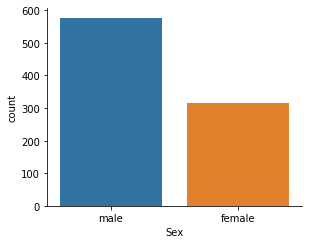

In [196]:
sns.catplot('Sex', data=titanic_df,kind="count", height=3.5, aspect=1.2)

In [197]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

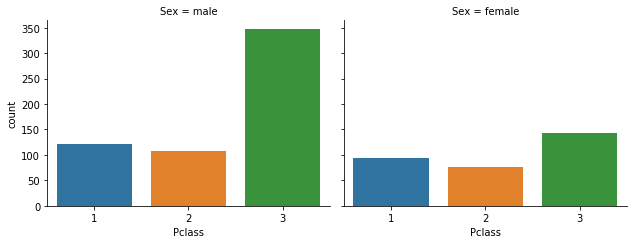

In [198]:
sns.catplot('Pclass',data=titanic_df,col='Sex',col_wrap=6,kind="count", height=3.5, aspect=1.2)

Wow, quite a few more males in the 3rd class than females, an interesting find. However, it might be useful to know the split between males,females,and children

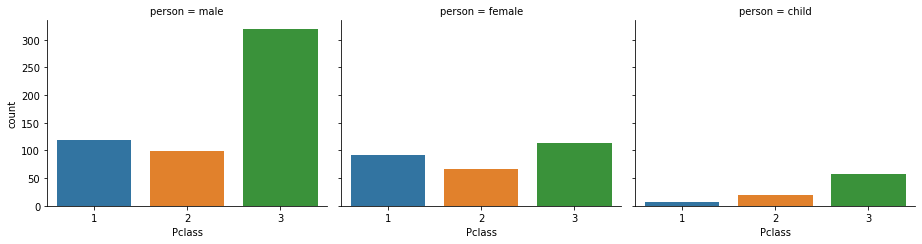

In [23]:
g = sns.catplot('Pclass', data=titanic_df, col='person',col_wrap=4,kind="count", height=3.5, aspect=1.2)
g

we have seperated the passengers between female,male,and child. This will be important later on beacuse of the famous "Women and children first policy"!

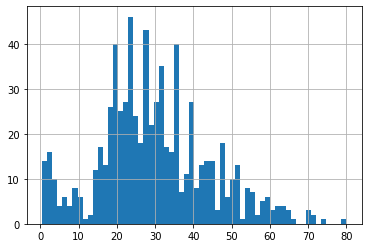

In [45]:
titanic_df['Age'].hist(bins=60)

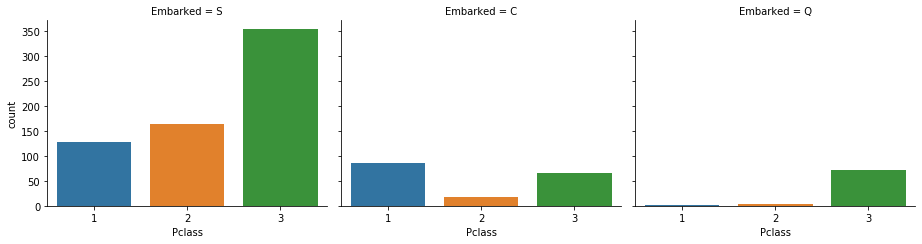

In [46]:
sns.catplot('Pclass',data=titanic_df, col='Embarked',col_wrap=4,kind="count", height=3.5, aspect=1.2)

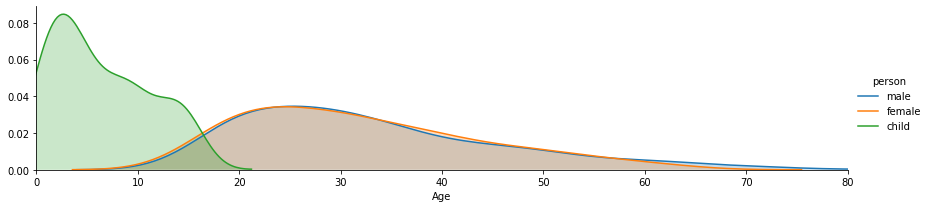

In [4]:
fig = sns.FacetGrid(titanic_df, hue="person",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()


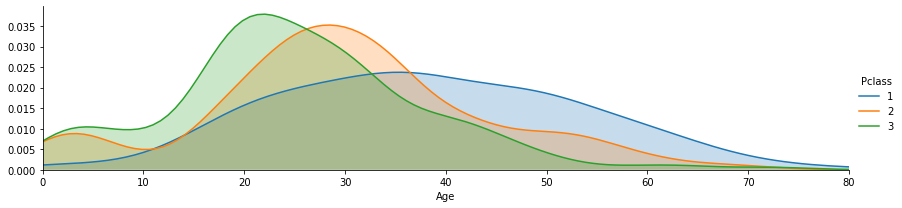

In [54]:
fig = sns.FacetGrid(titanic_df, hue='Pclass', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [24]:
deck = titanic_df['Cabin'].dropna()
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

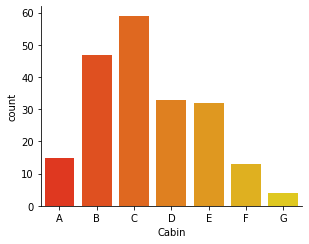

In [25]:
levels = []

for level in deck:

    levels.append(level[0])
    
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']

sns.catplot('Cabin', data=cabin_df, palette='autumn',order = ['A', 'B', 'C','D','E','F','G'],kind="count", height=3.5, aspect=1.2)

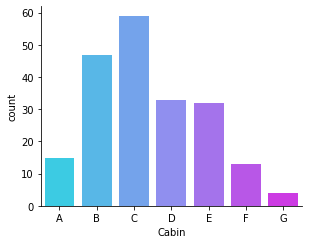

In [26]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']

sns.catplot('Cabin', data=cabin_df, palette='cool',order = ['A', 'B', 'C','D','E','F','G'], kind="count", height=3.5, aspect=1.2)

In [27]:
# Let's start by adding a new column to define alone

titanic_df['alone'] = titanic_df['SibSp'] + titanic_df['Parch']
titanic_df['alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: alone, Length: 891, dtype: int64

In [28]:
titanic_df['alone'].loc[titanic_df['alone'] >0] = 'With Family'
titanic_df['alone'].loc[titanic_df['alone'] == 0] = 'Alone'

titanic_df['alone']

0      With Family
1      With Family
2            Alone
3      With Family
4            Alone
          ...     
886          Alone
887          Alone
888    With Family
889          Alone
890          Alone
Name: alone, Length: 891, dtype: object

In [14]:
titanic_df['alone']

0      With Family
1      With Family
2            Alone
3      With Family
4            Alone
          ...     
886          Alone
887          Alone
888    With Family
889          Alone
890          Alone
Name: alone, Length: 891, dtype: object

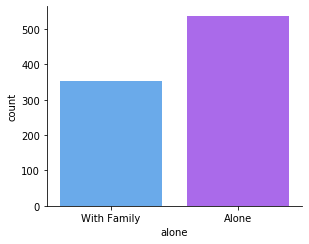

In [15]:
sns.catplot('alone', data=titanic_df,palette = 'cool', kind="count", height=3.5, aspect=1.2)

In [16]:
titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

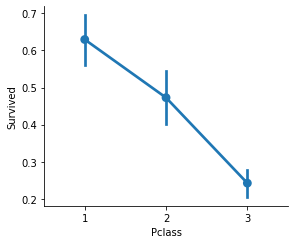

In [17]:
sns.catplot(x = 'Pclass',y = 'Survived', data=titanic_df, kind="point", height=3.5, aspect=1.2)

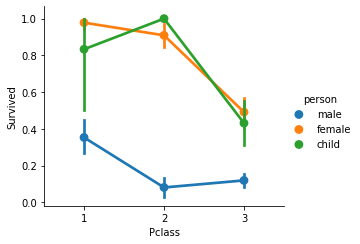

In [18]:
sns.catplot(x = 'Pclass',y = 'Survived', data=titanic_df, hue='person',kind="point", height=3.5, aspect=1.2)

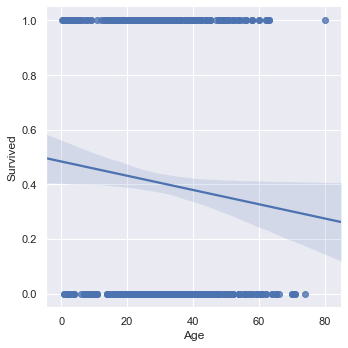

In [211]:

sns.set(color_codes=True)
sns.lmplot('Age','Survived',data=titanic_df)

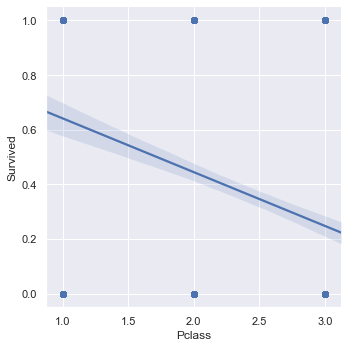

In [213]:
sns.lmplot('Pclass','Survived',data=titanic_df)

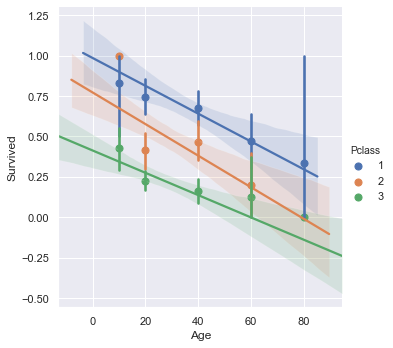

In [218]:
sns.lmplot('Age','Survived',data=titanic_df, hue='Pclass', x_bins=[10,20,40,60,80])

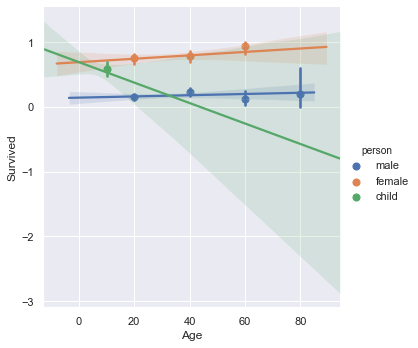

In [223]:
sns.lmplot('Age','Survived',data=titanic_df, hue='person', x_bins=[10,20,40,60,80])

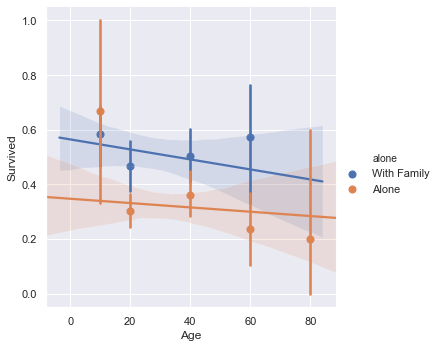

In [234]:
sns.lmplot('Age','Survived',data=titanic_df, hue='alone', x_bins=[10,20,40,60,80])